In [1]:
#importando algumas bibliotecas que usaremos no decorrer do notebook
import osmnx as ox
import networkx as nx
import numpy as np
import pickle

# Para começar

A biblioteca OSMnx pode importar o grafo de uma rede urbana diretamente da plataforma *OpenStreetMap* desde que existe uma conexão ativa com a internet. Existem várias funções para extrair um grafo:
- `graph_from_place('São Carlos, SP, Brasil')`: Extrai o grafo contido nos limites do município de São Carlos;
- `graph_from_bbox(norte, sul, leste, oeste)`: Extrai o grafo contido na caixa delimitada pelas coordenadas (norte, sul, leste, oeste);
- `graph_from_polygon(poligono)`: Extrai o grafo contido no polígono definido;
- `graph_from_point((lat,lon), Distância)`: Extrai o grafo centrado no ponto, em um quadrado com lado igual a 2xDistância;
- `graph_from_address('São Carlos, SP, Brasil', Distância)`:  similar ao método por ponto, mas utiliza como ponto o centro do endereço.

graph_from_place:


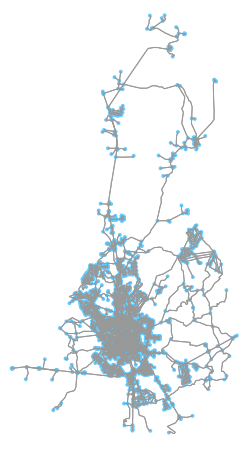

(<Figure size 334.223x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9f6719dd8>)

In [2]:
#pegando tudo dentro do limite municipal
G = ox.graph_from_place('São Carlos, SP, Brasil')
print('graph_from_place:')
ox.plot_graph(G, fig_height=8)



graph_from_address, dist=5000 metros:


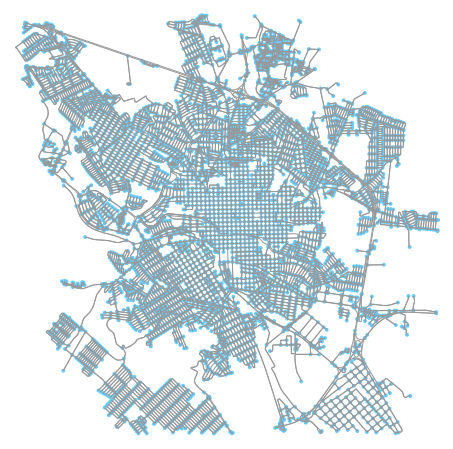

(<Figure size 627.795x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9f399abe0>)

In [3]:
#pegando apenas um quadrado de 2x5km = 10km de lado
G = ox.graph_from_address('São Carlos, SP, Brasil', distance=5_000)
print('\n\ngraph_from_address, dist=5000 metros:')
ox.plot_graph(G, fig_height=8)

Utilizar todas as vias do limite municipal é demais para o objetivo de nosso projeto. Podemos usar apenas o centro urbanizado de São Carlos, como o quadrado de 10km de lado (100km²) da função `graph_from_address()`, como feito na célula anterior.

Como fizemos anteriormente, o grafo fica armazenado em uma variável `G`. Nessa variável estão armazenadas todas as informações relativas ao grafo, em particular os **nós (vértices)** e **arestas**.


## Nós
Vamos começar pelos nós:

In [4]:
#nós do grafo
G.nodes

NodeView((997687296, 1015709698, 1015709703, 1015709706, 1015709710, 1015709712, 5156294329, 4712693784, 1015709725, 506822687, 1015709727, 1015709730, 506822694, 1015709735, 506822699, 1015709739, 1015709742, 1015709747, 1015709758, 1015709761, 1015709762, 1015709764, 1015709770, 1015709772, 1015709774, 2372829270, 5025461000, 491798637, 5025461001, 540498619, 4712693935, 6695387328, 4712693953, 6152192196, 4701552845, 4712693965, 6695387345, 4701552855, 4701552856, 6695387361, 6695387362, 4701552872, 4701552873, 2323169512, 2323169513, 6695387373, 336855278, 6695387381, 2323169527, 491798775, 4712694013, 2323169533, 2323169536, 506822925, 6423006752, 1698218264, 1015217680, 1698218275, 6423006756, 2679488809, 2679488815, 2679488817, 2679488819, 2679488820, 2679488821, 6055395639, 6055395640, 2679488823, 2679488824, 6055395644, 6055395645, 6055395646, 6055395647, 6055395648, 6055395649, 6055395650, 2679488828, 6055395652, 6055395653, 2679488837, 2679488838, 2679488839, 2679488841, 267

Um nó é determinado por um id específico, um número único definido pelo *OpenStreetMap* (osmid). Cada nó de um grafo extraído pelo OSMnx contém ainda informações sobre as coordenadas geográficas, que podem ser acessadas a partir de um dicionário contido no grafo.

Vamos acessar algumas informações do nó de osmid 1118683628

In [5]:
G.nodes[1118683628]

{'y': -21.9895812, 'x': -47.8952643, 'osmid': 1118683628}

In [6]:
#apenas a latitude do ponto, referencia-se a coordenada 'y'
print('Latitude:\t', G.nodes[1118683628]['y'])
#apenas a longitude do ponto, referencia-se a coordenada 'x'
print('Longitude:\t', G.nodes[1118683628]['x'])

Latitude:	 -21.9895812
Longitude:	 -47.8952643


Se quisermos fazer alguma iteração pelos nós, o processo é simples.

Na célula abaixo, vamos calcular a latitude e a longitude médias. Para isso vamos criar duas listas, uma com todas as latitudes e outra com todas as longitudes iterando sobre todos os nós. Depois, vamos calcular a média dessas listas a partir da biblioteca numpy (importada na primeira célula desse notebook).

In [7]:
latitudes = [] #lista que vai conter todas as latitudes
longitudes = [] #lista que vai conter todas as longitudes

#vamos iterar sobre todos os nós contidos em nosso objeto G
for node in G.nodes:
    #pegando as coordenadas dos pontos
    lat = G.nodes[node]['y']
    lon = G.nodes[node]['x']
    #adicionando as coordenadas às listas
    latitudes.append(lat)
    longitudes.append(lon)
    
lat_media = np.mean(latitudes)
lon_media = np.mean(longitudes)
print(f'latitude média: {lat_media:.03f}\nlongitude média: {lon_media:.03f}')

latitude média: -22.014
longitude média: -47.894


## Arestas

As arestas são elementos conectivos de um grafo, e expressam relações entre nós. Por conta disso, as arestas não possuem ids específicos em um grafo no python (apesar de o possuírem na plataforma OpenStreetMap), mas são referenciados a partir de uma tupla com três coordenadas do tipo (no_de_origem, no_final, id).

Os elementos no_de_origem e no_final são sempre pertencentes ao conjunto de nós do grafo (`G.nodes`). O terceiro parâmetro, `id`, só é importante quando existem arestas paralelas (dois segmentos de vias com a mesma direção que conectam os mesmos dois pontos). Quando existem duas ou mais vias paralelas elas serão referenciadas como `(4701552856, 4701552856, 0)` (aresta 1), `(4701552856, 4701552856, 1)` (aresta 2), `(4701552856, 4701552856, 2)` (aresta 3) e assim por diante. Esses casos são relativamente raros em redes urbanas, mas no grafo de São Carlos possuímos alguns exemplos.

In [8]:
#arestas do grafo 
G.edges

OutMultiEdgeView([(997687296, 702236112, 0), (997687296, 862192364, 0), (1015709698, 973729191, 0), (1015709698, 1015709666, 0), (1015709703, 1015709761, 0), (1015709703, 1015709601, 0), (1015709703, 1015709609, 0), (1015709703, 1015709677, 0), (1015709706, 983273519, 0), (1015709706, 1015217373, 0), (1015709706, 1015709747, 0), (1015709710, 1015709604, 0), (1015709710, 1015709638, 0), (1015709710, 2381379460, 0), (1015709712, 1015709671, 0), (1015709712, 1015709638, 0), (1015709712, 1015709673, 0), (1015709712, 1015709588, 0), (1015709712, 2443310308, 0), (5156294329, 5156294339, 0), (5156294329, 5156294328, 0), (4712693784, 2768495158, 0), (4712693784, 2298150348, 0), (4712693784, 5481252590, 0), (4712693784, 5481251700, 0), (1015709725, 2443310307, 0), (1015709725, 1015709770, 0), (1015709725, 1015217306, 0), (506822687, 1014110982, 0), (506822687, 1027974843, 0), (506822687, 1014111217, 0), (1015709727, 528965276, 0), (1015709727, 1015709635, 0), (1015709727, 3778176578, 0), (10157

As arestas dos grafos extraídos pelo OSMnx possuem um maior volume de dados se comparados aos nós, já que as arestas do grafo são os elementos que de fato representas as vias urbanas.

Vamos acessar as informações de da aresta `(1015709703, 1015709601, 0)`

In [9]:
no_de_origem = 1015709703
no_final = 1015709601

G.edges[(no_de_origem, no_final, 0)]

{'osmid': 87317516,
 'name': 'Rua Pedro Bianchi',
 'highway': 'residential',
 'oneway': False,
 'length': 74.932}

Possuímos algumas características do segmento de via listadas. Algumas são simples de entender como o `osmid` que mostra o identificador da plataforma OSM; e o nome da via `Rua Pedro Bianchi`.

Sobre os outros parâmetros:
- `length` expressa o comprimento da via em metros.
- `highway` é um identificador do tipo de via, nesse caso, uma via residencial. Os outros tipos de via podem ser verificados em: https://wiki.openstreetmap.org/wiki/Key:highway
- `oneway` serve para identificar se a via possui tráfego em apenas um sentido. Nesse caso, a premissa é falsa, já que a via possui mão dupla.


O parâmetro `oneway` sendo falso é um indicativo de que a via possui mão dupla. Nesse caso,  o grafo divide a via em duas parcelas: o tráfego em um sentido e o tráfego no outro. Assim, se invertermos a ordem dos nós usando o no_final como no_de_origem e o no_de_origem como no_final, a aresta deve existir no grafo. Note que essas duas arestas não são paralelas, já que possuem orientações diferentes.

In [10]:
print('Primeiro Sentido:\n',no_de_origem, no_final)
print(G.edges[(no_de_origem, no_final, 0)])

no_de_origem, no_final = no_final, no_de_origem#invertendo a ordem dos nós de origem e final

print('\nSegundo Sentido:\n',no_de_origem, no_final)
print(G.edges[(no_de_origem, no_final, 0)])

Primeiro Sentido:
 1015709703 1015709601
{'osmid': 87317516, 'name': 'Rua Pedro Bianchi', 'highway': 'residential', 'oneway': False, 'length': 74.932}

Segundo Sentido:
 1015709601 1015709703
{'osmid': 87317516, 'name': 'Rua Pedro Bianchi', 'highway': 'residential', 'oneway': False, 'length': 74.932}


# Adicionando características ao grafo

Para adicionar uma característica ao grafo, é preciso construir um dicionário de características. Vamos, por exemplo, adicionar uma nova característica às nossas arestas. Teremos que criar um dicionário em que as chaves são as arestas e os valores são o valor da característica em questão.

Vamos criar uma nova característica com o comprimento em quilômetros: `length_km`

Para isso, vamos iterar sobre todas as arestas e adicionar as características a um dicionário.

In [11]:
length_km = {} #dicionário vazio que conterá o comprimento em km de todas as arestas

for edge in G.edges: #iterando sobre todas as arestas
    length = G.edges[edge]['length'] #comprimento em metros
    
    length_km[edge] = length/1_000 #adiciona o comprimento em quilômetros ao dicionário 

Vamos ver como ficou o nosso dicionário

In [12]:
length_km

{(997687296, 702236112, 0): 0.04336,
 (997687296, 862192364, 0): 0.011868,
 (1015709698, 973729191, 0): 0.17003100000000002,
 (1015709698, 1015709666, 0): 0.079366,
 (1015709703, 1015709761, 0): 0.100997,
 (1015709703, 1015709601, 0): 0.074932,
 (1015709703, 1015709609, 0): 0.0295,
 (1015709703, 1015709677, 0): 0.07897499999999999,
 (1015709706, 983273519, 0): 0.15642699999999998,
 (1015709706, 1015217373, 0): 0.06558,
 (1015709706, 1015709747, 0): 0.032959,
 (1015709710, 1015709604, 0): 0.06770999999999999,
 (1015709710, 1015709638, 0): 0.032420000000000004,
 (1015709710, 2381379460, 0): 0.036256000000000004,
 (1015709712, 1015709671, 0): 0.13090700000000002,
 (1015709712, 1015709638, 0): 0.08374899999999999,
 (1015709712, 1015709673, 0): 0.07463800000000001,
 (1015709712, 1015709588, 0): 0.095915,
 (1015709712, 2443310308, 0): 0.046562000000000006,
 (5156294329, 5156294339, 0): 0.027989999999999998,
 (5156294329, 5156294328, 0): 0.011509,
 (4712693784, 2768495158, 0): 0.0470750000000

Para cada aresta possuímos um valor de comprimento em quilômetros. Agora vamos adicionar essa informação como um atributo em nosso grafo `G` a partir da biblioteca NetworkX (importada no início do notebook).

In [13]:
nx.set_edge_attributes(G, length_km, 'length km') #adicionando as características ao grafo G, como o nome "length km"

print(G.edges[(no_de_origem, no_final, 0)]) #mostrando a aresta de antes

{'osmid': 87317516, 'name': 'Rua Pedro Bianchi', 'highway': 'residential', 'oneway': False, 'length': 74.932, 'length km': 0.074932}


Note que desta vez temos um atributo a mais, que criamos a partir do dicionário

# Carregando um grafo salvo

Para o projeto, precisaremos da elevação dos nós do grafo, além das características de latitude e longitude. Isso pode ser feito através do OSMnx, mas é necessário que seja fornecida uma chave da conta do Google Maps API (que pode ser cobrada a depender do número de solicitações que o usuário fizer). 

Uma alternativa gratuita é utilizar a API do `open-elevation.com`, mas durante a contrução desse notebook, a API aparentemente estava fora do ar, por isso vamos utilizar um grafo já com o atributo `elevation` adicionado ao grafo, que foi extraído a partir de minha conta do Google Maps API.

Existem várias maneiras de se carregar um grafo no Python. Algumas delas já estão implementadas no NetworkX com algumas funções `read` e `write` do NetworkX. Um grafo extraído a partir da biblioteca OSMnx, contudo, é uma extrutura muito mais complexa que a maioria dos grafos, com várias informações que podem ser perdidas caso o grafo seja salvo em um dos formatos mais usuais. Por conta disso, utilizaremos a biblioteca `pickle` do Python que pode salvar e carregar qualquer objeto criado no Python.

Para um exemplo, vamos salvar o grafo que modificamos anteriormente em um arquivo com nome `ExemploSC.graph`. Para isso vamos abrir um novo arquivo com a função `open()` no modo *escrever bits (write bits)* com a tag `'wb'` e salvar nesse arquivo o nosso grafo `G`.

In [14]:
pickle.dump(G, open('ExemploSC.graph', 'wb'))

Note que na pasta em que se encontra esse notebook deve ter aparecido um arquivo de nome `ExemploSC.graph`. Vamos carrega-lo em outra variável utilizando a função `open()` no modo *leitura de bits (read bits)* com a tag `rb`.

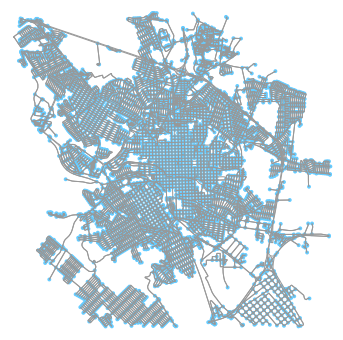

(<Figure size 470.846x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9fa7892b0>)

In [15]:
G_loaded = pickle.load(open('ExemploSC.graph', 'rb'))
ox.plot_graph(G_loaded)

## Ao que interessa:

Vamos carregar um grafo em que eu adicionei as informações de elevação aos nós do grafo, `SCElevation.graph`, e vamos olhar um dos nós desse grafo para ver se a elevação está contida no objeto.

In [16]:
G = pickle.load(open('SCElevation.graph','rb'))
G.nodes[1118683628]

{'y': -21.9895812, 'x': -47.8952643, 'osmid': 1118683628, 'elevation': 828.084}

Ótimo! O nó consultado está à elevação de 828.084 m acima do nível do mar.

Vamos plotar a elevação dos nós no grafo para verificar a formação topográfica de São Carlos:

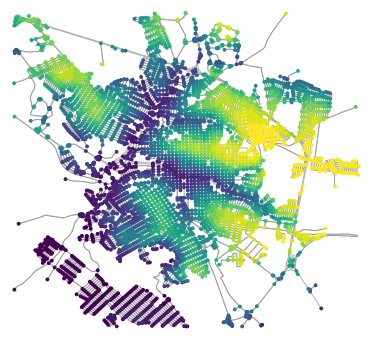

(<Figure size 462.76x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9f797c358>)

In [17]:
colors = ox.get_node_colors_by_attr(G, 'elevation', cmap='viridis', num_bins=20) #gera cores a partir de um atributo
ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_zorder=3)

Parece bom. Os vales dos rios estão bem definidos na porção central e na oeste.

Vamos criar algo mais útil para nosso projeto. A partir da elevação dos nós extremos, vamos criar um atributo com a inclinação da via. Isso é uma iteração um pouco mais complicada. Vamos passar por todas as arestas do grafo e pegar a elevação dos dois nós extremos da aresta. Depois, vamos calcular a inclinação da aresta.

In [18]:
inclinacoes = {} #dicionário que conterá as inclinações
for edge in G.edges:
    no1 = edge[0] #no de origem da aresta
    no2 = edge[1] #no final da aresta
    
    #pegando a elevação dos nós extremos
    elevacao_no1 = G.nodes[no1]['elevation']
    elevacao_no2 = G.nodes[no2]['elevation']
    
    #para o calculo da inclinação, precisamos do comprimento da via
    comprimento = G.edges[edge]['length']
    
    # calculamos a inclinação em m/m
    inclinacao = (elevacao_no2-elevacao_no1)/comprimento
    
    #finalmente, adicionamos a inclinação ao nosso dicionário
    inclinacoes[edge] = inclinacao

Agora podemos adicionar esse atributo ao nosso Grafo

In [19]:
nx.set_edge_attributes(G, inclinacoes, 'slope')

Vamos observar uma das arestas e sua contrapartida

In [20]:
no_de_origem = 1015709703
no_final = 1015709601

print('Primeiro Sentido:\n',no_de_origem, no_final)
print(G.edges[(no_de_origem, no_final, 0)])

no_de_origem, no_final = no_final, no_de_origem#invertendo a ordem dos nós de origem e final

print('\nSegundo Sentido:\n',no_de_origem, no_final)
print(G.edges[(no_de_origem, no_final, 0)])

Primeiro Sentido:
 1015709703 1015709601
{'osmid': 87317516, 'name': 'Rua Pedro Bianchi', 'highway': 'residential', 'oneway': False, 'length': 74.932, 'bearing': 122.342, 'population': 1.380952380952381, 'slope': -0.014386376981796489}

Segundo Sentido:
 1015709601 1015709703
{'osmid': 87317516, 'name': 'Rua Pedro Bianchi', 'highway': 'residential', 'oneway': False, 'length': 74.932, 'bearing': 302.341, 'population': 1.380952380952381, 'slope': 0.014386376981796489}


Os dois sentidos da via possuem inclinações opostas, o que era de se esperar! Contudo, vamos também criar um atributo com a inclinação em valor absoluto para podermos plotar as inclinações de forma mais compreensível.

In [21]:
abs_slope = {}
for edge in G.edges:
    inclinacao = G.edges[edge]['slope']
    abs_slope[edge] = abs(inclinacao)

nx.set_edge_attributes(G, abs_slope, 'abs slope') #define a inclinação em valor absoluto

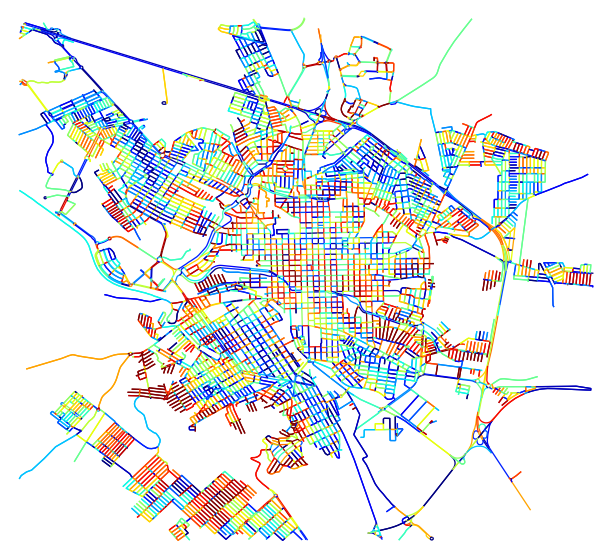

(<Figure size 771.267x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9fa431a90>)

In [22]:
#plotando o grafo
colors = ox.get_edge_colors_by_attr(G, 'abs slope', cmap='jet', num_bins=20) #gera cores a partir de um atributo
ox.plot_graph(G, edge_color=colors, fig_height=10, edge_linewidth=1.3, node_size=0)

Em vermelho estão as maiores inclinações; em azul, as menores. É possível notar que São Carlos possui inclinações bastante acentuadas, principalmente no entorno dos vales.

# O caminho à frente
Nós precisaremos da informação sobre a inclinação que acabamos de obter para conseguir identificar as rotas mais prováveis de serem escolhidas pelos ciclistas. Para isso, vamos precisar de algumas ferremantas para achar caminhos mínimos entre pontos de nosso grafo o que vai ser mostrado em detalhes em um outro notebook.

O que sugiro agora é que explore um pouco o grafo para se familiarizar com essa nova maneira de fazer planejamento urbano.

## Sugestão
### Tente responder às seguintes perguntas:

- Qual o ponto mais alto da cidade de São Carlos?
- E o mais baixo?
- Quantas arestas possui o grafo de São Carlos?
- Quantos nós?
- Qual a inclinação média das vias da cidade de São Carlos?
- Qual a inclinação média das vias categorizadas como residenciais (ou seja, `'highway'`=`'residential'`)?
- Qual a inclinação média das vias principais (ou seja, `'highway'`=`'primary'`)?